In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import math
import pandas as pd
import skrf as rf

2025-07-27 15:08:28.719135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753646908.736447 1322696 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753646908.742262 1322696 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-27 15:08:28.762703: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pickle

# Replace 'your_data.pkl' with the path to your .pkl file
file_path = '/rdf/shared/design_automation/Data_EMX/XFMRParallel_2504/SEG/10.pkl'

with open(file_path, 'rb') as f:
    loaded_list = pickle.load(f)

totalD = loaded_list[0]
totalU = loaded_list[1]
print(totalD)
print(len(totalD))
print(totalU)
print(len(totalU))

[(13, 139, [(-21.5, -232.5), (-21.5, -64.5)]), (np.float64(13.0), 39, [(np.float64(-15.0), np.float64(-71.0)), (np.float64(-32.0), np.float64(-71.0)), (np.float64(-89.0), np.float64(-14.0)), (np.float64(-89.0), np.float64(14.0)), (np.float64(-31.999999999999996), np.float64(71.0)), (np.float64(32.0), np.float64(71.0)), (np.float64(89.0), np.float64(14.0)), (np.float64(89.0), np.float64(-14.0)), (np.float64(31.999999999999996), np.float64(-71.0)), (np.float64(15.0), np.float64(-71.0))]), (np.float64(13.0), 39, [(np.float64(-15.0), np.float64(-106.0)), (np.float64(-46.49747468305833), np.float64(-106.0)), (np.float64(-124.0), np.float64(-28.497474683058336)), (np.float64(-123.99999999999999), np.float64(28.497474683058336)), (np.float64(-46.49747468305833), np.float64(106.0)), (np.float64(46.49747468305833), np.float64(106.0)), (np.float64(124.0), np.float64(28.497474683058336)), (np.float64(123.99999999999999), np.float64(-28.497474683058336)), (np.float64(46.49747468305833), np.float64

In [4]:
import numpy as np
node_D = []
for item in totalD:
    wid = item[0]
    layer = item[1]
    for node in item[2]:
        node_D.append(node)
print(node_D)
print(len(node_D))
print(np.shape(node_D))
node_D = list(dict.fromkeys(node_D))
print(node_D)
print(len(node_D))
print(np.shape(node_D))

[(-21.5, -232.5), (-21.5, -64.5), (np.float64(-15.0), np.float64(-71.0)), (np.float64(-32.0), np.float64(-71.0)), (np.float64(-89.0), np.float64(-14.0)), (np.float64(-89.0), np.float64(14.0)), (np.float64(-31.999999999999996), np.float64(71.0)), (np.float64(32.0), np.float64(71.0)), (np.float64(89.0), np.float64(14.0)), (np.float64(89.0), np.float64(-14.0)), (np.float64(31.999999999999996), np.float64(-71.0)), (np.float64(15.0), np.float64(-71.0)), (np.float64(-15.0), np.float64(-106.0)), (np.float64(-46.49747468305833), np.float64(-106.0)), (np.float64(-124.0), np.float64(-28.497474683058336)), (np.float64(-123.99999999999999), np.float64(28.497474683058336)), (np.float64(-46.49747468305833), np.float64(106.0)), (np.float64(46.49747468305833), np.float64(106.0)), (np.float64(124.0), np.float64(28.497474683058336)), (np.float64(123.99999999999999), np.float64(-28.497474683058336)), (np.float64(46.49747468305833), np.float64(-106.0)), (np.float64(15.0), np.float64(-106.0)), (np.float64(

In [5]:
import numpy as np
node_D = []
for item in totalU:
    wid = item[0]
    layer = item[1]
    for node in item[2]:
        node_D.append(node)
print(node_D)
print(len(node_D))
print(np.shape(node_D))
node_D = list(dict.fromkeys(node_D))
print(node_D)
print(len(node_D))
print(np.shape(node_D))

[(-19.0, 232.5), (-19.0, 84.5), (np.float64(-15.0), np.float64(88.5)), (np.float64(-39.248737341529164), np.float64(88.5)), (np.float64(-106.5), np.float64(21.248737341529164)), (np.float64(-106.5), np.float64(-21.248737341529164)), (np.float64(-39.248737341529164), np.float64(-88.5)), (np.float64(39.248737341529164), np.float64(-88.5)), (np.float64(106.5), np.float64(-21.248737341529164)), (np.float64(106.5), np.float64(21.248737341529164)), (np.float64(39.248737341529164), np.float64(88.5)), (np.float64(15.0), np.float64(88.5)), (np.float64(-15.0), np.float64(123.5)), (np.float64(-53.74621202458749), np.float64(123.5)), (np.float64(-141.5), np.float64(35.74621202458749)), (np.float64(-141.5), np.float64(-35.74621202458749)), (np.float64(-53.74621202458749), np.float64(-123.5)), (np.float64(53.74621202458749), np.float64(-123.5)), (np.float64(141.5), np.float64(-35.74621202458749)), (np.float64(141.5), np.float64(35.74621202458749)), (np.float64(53.74621202458749), np.float64(123.5)),

### Data Loading

In [6]:
#define the targeted max frequency
fmax = 200
fstart = 0

#data loading function for images and tabular- derived from CNN path, same function used for MLP
#define function for loading images and s-parameters
#"path" is the path for images of transformer layout
#"label" is the path for labels. In this case, labels are S-parameter associated with each images 
def load_images_from_path(path, label,length):
    images = []
    labels = []
    error = []
    for kk in range(length):
        #load images
        img = image.load_img(path+str(kk)+'.png', target_size=(300, 300, 3))
        images.append(image.img_to_array(img)[38:262,38:262,:])#trim the ground margin

        #load S-parameters
        #According to symmerty, only S11,S12,S13,S14,S33,S34 are considered
        #Each S-parameter has real and imaginary parts, and hence 12 real values in total.
        results = []
        datafile = label+str(kk)+".s4p"
        spt = rf.Network(datafile)
        step = int(1e9/(spt.f[1]-spt.f[0]))
        for k in range(fmax+1):
            i = int((k+fstart)*step/2)
            results.append([spt.s[i][0][0].real,spt.s[i][0][0].imag,
                            spt.s[i][0][1].real,spt.s[i][0][1].imag,
                            spt.s[i][0][2].real,spt.s[i][0][2].imag,
                            spt.s[i][0][3].real,spt.s[i][0][3].imag,
                            spt.s[i][2][2].real,spt.s[i][2][2].imag,
                            spt.s[i][2][3].real,spt.s[i][2][3].imag])     
        labels.append(results)
        sp = np.array(results)
        invalid = False
        '''
        for k in range(len(sp)-3):
            for x in range(6):
                if (np.square(sp[k][2*x])+np.square(sp[k][2*x+1]))>1.02:
                    invalid = True
                
            for x in range(12):
                if abs(sp[k][x]+sp[k+2][x]-2*sp[k+1][x])>0.03:
                    invalid = True
                    '''
        if (invalid):
            error.append(kk)
    return images, labels,error

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)

In [7]:
#import tensorflow_datasets as tfds
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')]

In [8]:
import skrf as rf
from scipy.spatial import distance
from scipy.linalg import eigh
#define the targeted max frequency
fmax = 200
#define function for loading ind and s-parameters
#"path" is the path for ind of transformer layout
#"label" is the path for labels. In this case, labels are S-parameter associated with each ind 
def load_ind_from_path(path, label,length):
    ind_a = []
    ind_b = []
    labels = []
    error = []
    for kk in range(length):
        result_a = []
        result_b = []
        #load ind
        file_path = (path+str(kk)+'.pkl')
        with open(file_path, 'rb') as f:
            loaded_list = pickle.load(f)
        totalD = loaded_list[0]
        node_D = []
        for item in totalD:
            wid = item[0]
            layer = item[1]
            for node in item[2]:
                node_D.append(node)
        #print(np.shape(node_D))
        node_D = list(dict.fromkeys(node_D))
        #print(np.shape(node_D))
        inda_node = np.array(node_D)
        #print(np.shape(inda_node))
        totalU = loaded_list[1]
        node_U = []
        for item in totalD:
            wid = item[0]
            layer = item[1]
            for node in item[2]:
                node_U.append(node)
        node_U = list(dict.fromkeys(node_U))
        indb_node = np.array(node_U)
        dst_a = np.zeros(len(inda_node)-1)
        aj_a = np.zeros((len(inda_node),len(inda_node)))
        dst_b = np.zeros(len(indb_node)-1)
        aj_b = np.zeros((len(indb_node),len(indb_node)))
        
        for x in range(len(inda_node)-1):
            dst = distance.euclidean(inda_node[x],inda_node[x+1])
            dst_a[x] = dst
            aj_a[x][x+1] = dst_a[x]
            aj_a[x+1][x] = dst_a[x]
        
        eigenvalues, eigenvectors = eigh(aj_a)
        
        for x in range(len(inda_node)-1):
            if(inda_node[x+1][0]==15) or (inda_node[x+1][0]==-15):
                continue
            result_a.append([inda_node[x][0]/100,inda_node[x][1]/100,inda_node[x+1][0]/100,inda_node[x+1][1]/100,dst_a[x]/100,0,np.sum(eigenvectors[x][1]+eigenvectors[x+1][1])])
        ind_a.append(result_a)
        
        for x in range(len(indb_node)-1):
            dst = distance.euclidean(indb_node[x],indb_node[x+1])
            dst_b[x] = dst
            aj_b[x][x+1] = dst_b[x]
            aj_b[x+1][x] = dst_b[x]
        
        eigenvalues, eigenvectors = eigh(aj_b)
        
        for x in range(len(indb_node)-1):
            if(indb_node[x+1][0]==15) or (indb_node[x+1][0]==-15):
                continue
            result_b.append([indb_node[x][0]/100,indb_node[x][1]/100,indb_node[x+1][0]/100,indb_node[x+1][1]/100,dst_b[x]/100,0,np.sum(eigenvectors[x][1]+eigenvectors[x+1][1])])
        ind_b.append(result_b)
        #load S-parameters
        #According to symmerty, only S11,S12,S13,S14,S33,S34 are considered
        #Each S-parameter has real and imaginary parts, and hence 12 real values in total.
        results = []
        datafile = label+str(kk)+".s4p"
        spt = rf.Network(datafile)
        step = int(1e9/(spt.f[1]-spt.f[0]))
        for k in range(fmax+1):
            i = k*step
            results.append([spt.s[i][0][0].real,spt.s[i][0][0].imag,
                            spt.s[i][0][1].real,spt.s[i][0][1].imag,
                            spt.s[i][0][2].real,spt.s[i][0][2].imag,
                            spt.s[i][0][3].real,spt.s[i][0][3].imag,
                            spt.s[i][2][2].real,spt.s[i][2][2].imag,
                            spt.s[i][2][3].real,spt.s[i][2][3].imag])     
        sp = np.array(results)
        invalid = False
        '''
        for k in range(len(sp)-3):
            for x in range(12):
                if abs(sp[k][x]+sp[k+2][x]-2*sp[k+1][x])>0.03:
                    invalid = True
                    '''
        if (invalid):
            error.append(kk)
        labels.append(results) 
    return ind_a,ind_b, labels,error

In [9]:
def load_from_path(path):
    logfile = open(path+"log.txt","r")
    listall = list(map(lambda item: list(map(lambda jtem: eval(jtem.strip()), item[1:-1].split(','))), logfile.read().strip().split('\n')))
    tabular_data = np.array(listall)

#load images and s-parameters
    length = len(tabular_data)
    images, labels,error = load_images_from_path(path+"PNG/", path+"SPData/",length) #cnn, mlp data load
    ind_a, ind_b, bang,bong = load_ind_from_path(path+"SEG/", path+"SPData/",length) #GT data load

    
    show_images(images)
    srf = np.load(path+"/srf.npy")

    for kk in range(length):
    #select 1 turn and 1 turn transformers
        if kk in error:
            continue   
        if((tabular_data[kk,4]!=0) and (tabular_data[kk,5]!=0)):
       #geoparas only includes the variable parameters in our designs. 
       #Constants at this design stages are excluded 
            temp = next((item for item in reversed(tabular_data) if item[14] == kk), None)
            geoparas.append(np.array(temp)[[0,1,2,3,4,7,8,9,13]])
            images11.append(images[kk])
            labels11.append(labels[kk])
            srf_list.append(srf[kk])
        if((tabular_data[kk,2]!=0) or (tabular_data[kk,3]!=0)):
       #b only includes the variable parameters in our designs. 
       #Constants at this design stages are excluded
            for i in range(len(ind_a[kk])):
                ind_a[kk][i][5] = tabular_data[kk][4]
            for i in range(len(ind_b[kk])):
                ind_b[kk][i][5] = tabular_data[kk][4]
            ind_a11.append(np.array(ind_a[kk]))
            ind_b11.append(np.array(ind_b[kk])) #potential cause of issue if comes up in future - different label lists for graph and cnn
            

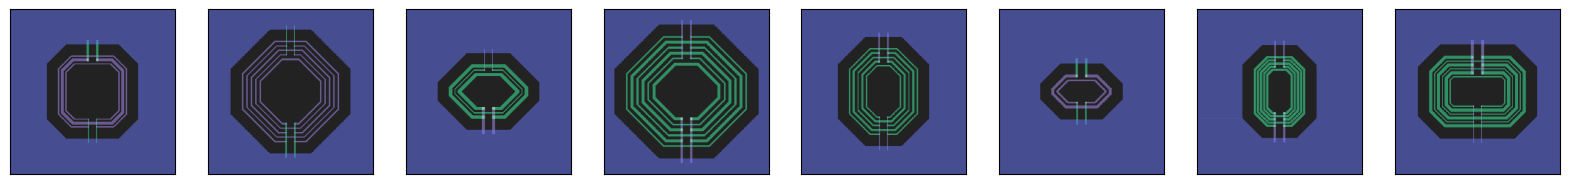

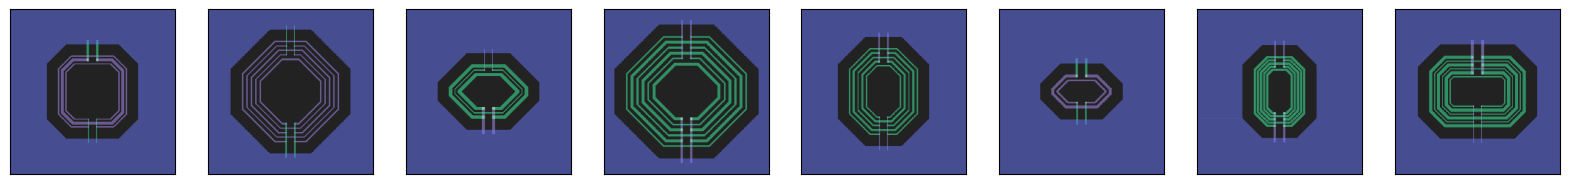

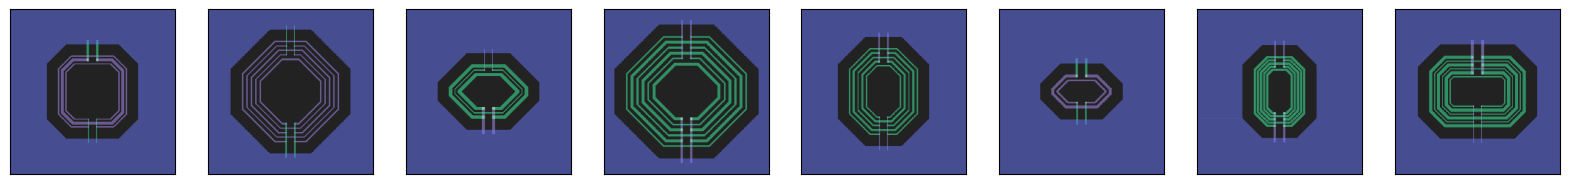

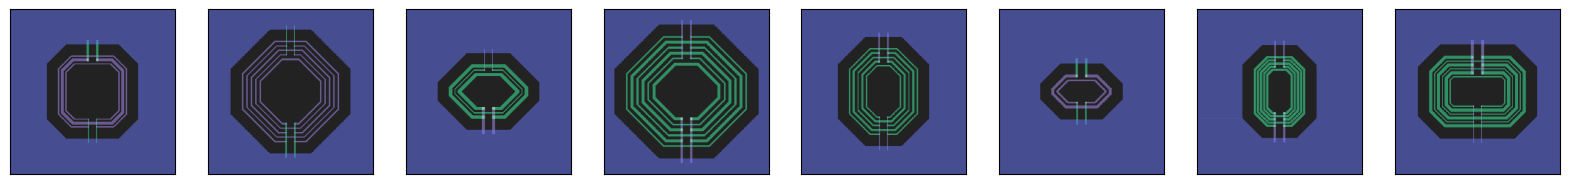

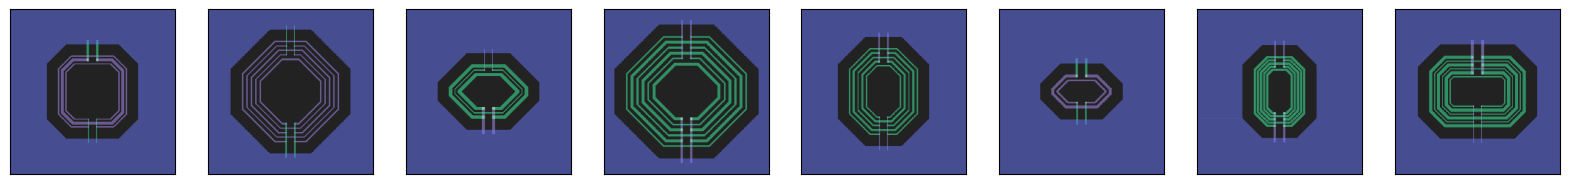

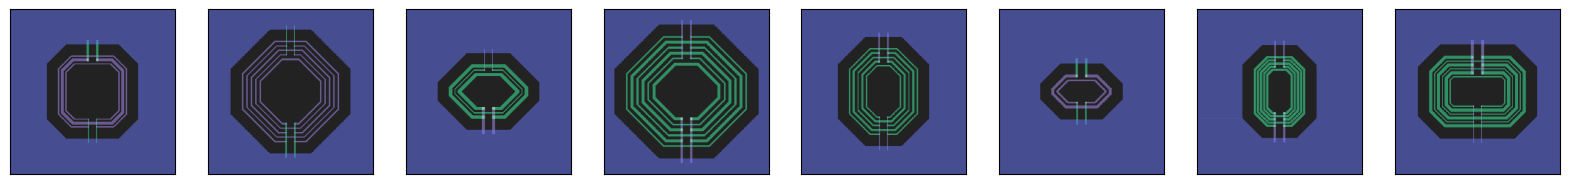

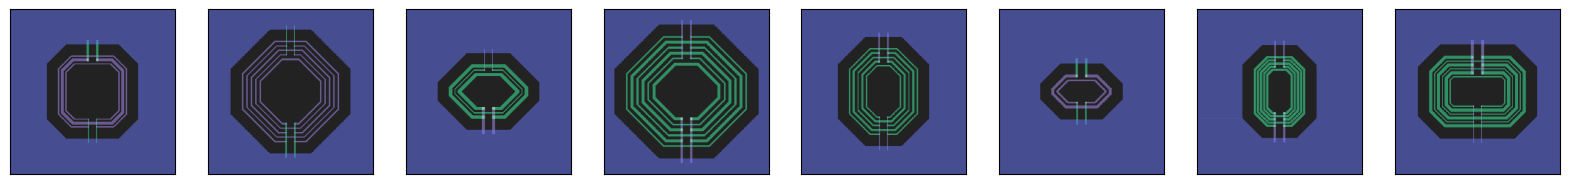

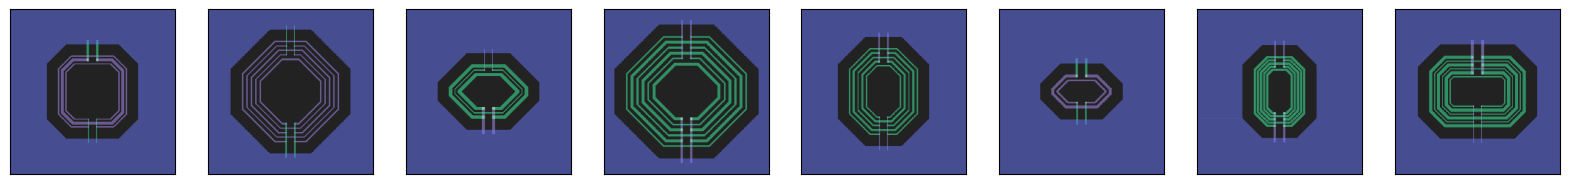

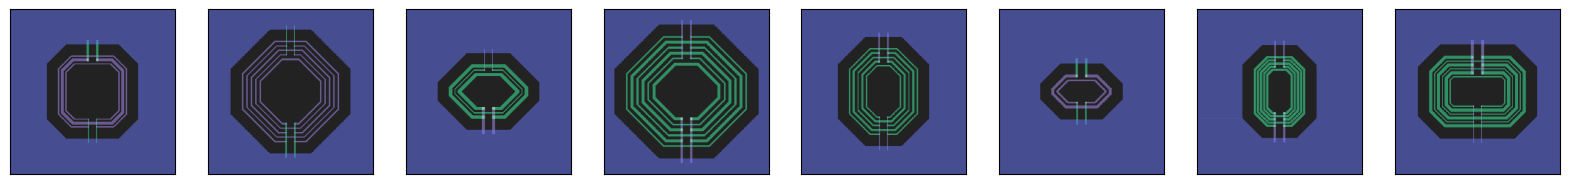

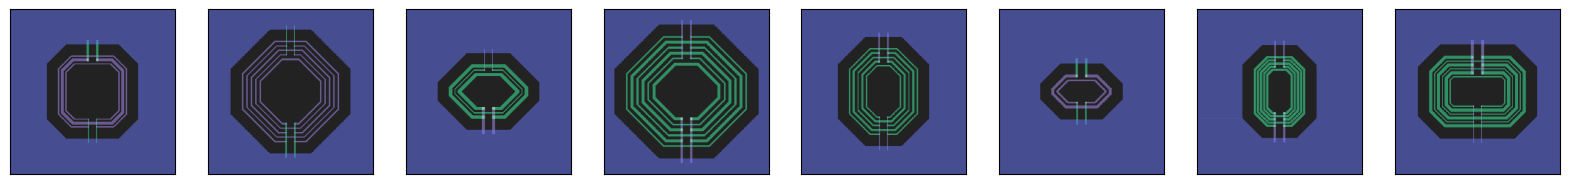

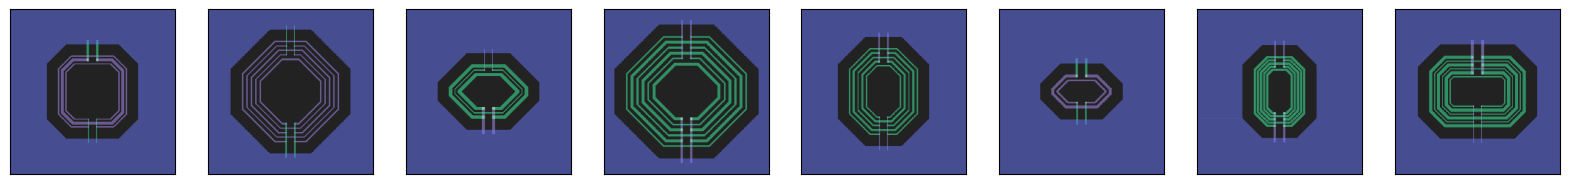

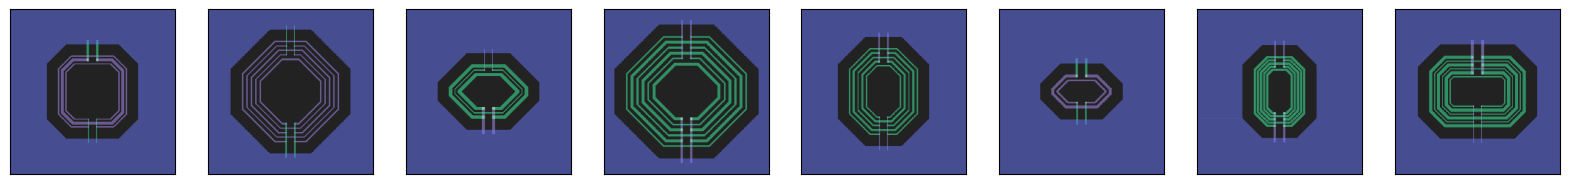

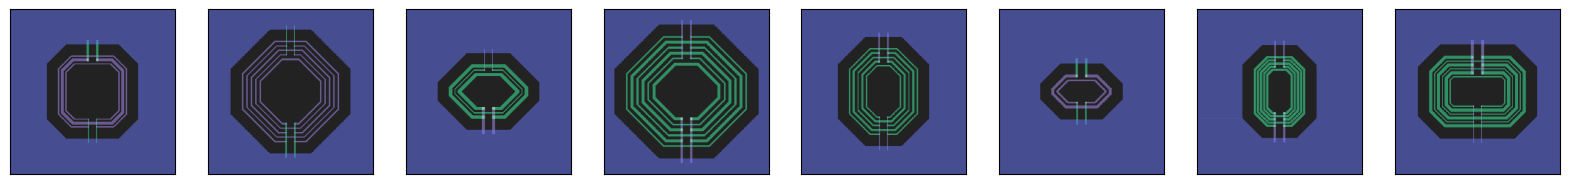

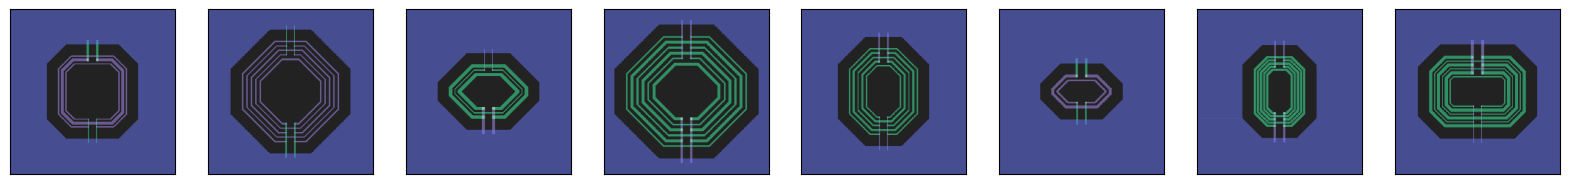

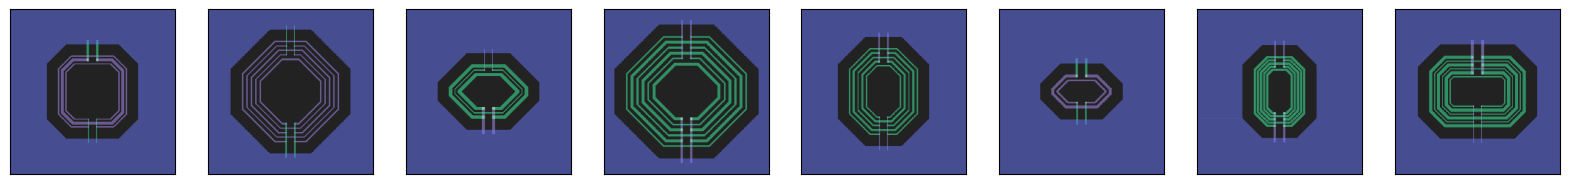

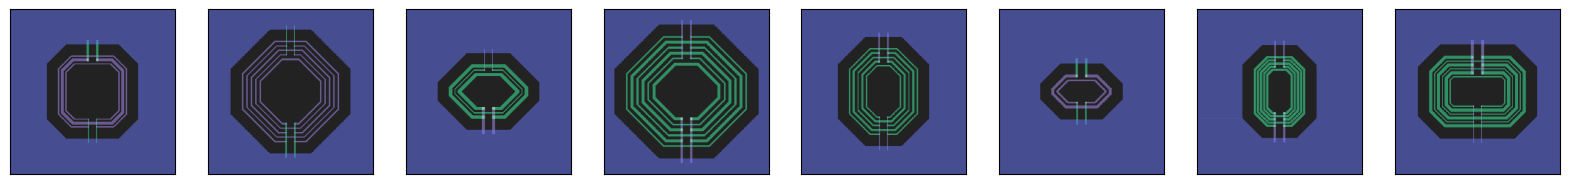

In [10]:
#load data
#geometrical parameters stored in log.txt
#order of geopara (radiusA,radiusB,turnsA,turnsB,openA,openB,outA,outB,extA,extB,ratio,outbound)
geoparas = []
images11 = []
labels11 = []
ind_a11 = []
ind_b11 = []
srf_list = []
for i in range(4):
    for j in range(4):
        path = "/rdf/shared/design_automation/Data_EMX/XFMRParallel_2504"+"/"
        load_from_path(path)

### Unimodal Encoder Architectures

In [11]:
#Schematic (CNN)
class SchemEncoder(nn.Module):
    def __init__(self, fmax):
        super(SchemEncoder, self).__init__()
        
        # Define the CNN part for input 1 (224x224x3)
        self.cnn = nn.Sequential(
            nn.Conv2d(3, n_channel, kernel_size=3, stride=1, padding=1),  # (224, 224, 32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (112, 112, 32)
            nn.Conv2d(n_channel, n_channel*2, kernel_size=3, stride=1, padding=1),  # (112, 112, 128)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (56, 56, 128)
            nn.Conv2d(n_channel*2, n_channel*4, kernel_size=3, stride=1, padding=1),  # (56, 56, 128)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (28, 28, 128)
            nn.Conv2d(n_channel*4, n_channel*4, kernel_size=3, stride=1, padding=1),  # (28, 28, 128)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (14, 14, 128)
            nn.Conv2d(n_channel*4, n_channel*4, kernel_size=3, stride=1, padding=1),  # (14, 14, 128)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (7, 7, 128)
            nn.Flatten(),  # Flatten to (7 * 7 * 128)
            nn.Linear(7 * 7 * n_channel*4, 512),  # Fully connected layer
            nn.ReLU(),
        )
        
        # Define the output layers
        self.fc = nn.Sequential(
            nn.Linear(512, fmax * 12),  # Concatenate with input 2 (12 features)
            nn.Tanh(),
        )
        self.reshape = nn.Unflatten(1, (fmax, 12))  # Reshape to (fmax, 12)

    def forward(self, x1):
        # Process input 1 through CNN
        x = self.cnn(x1)
        # Concatenate with input 2
        #x = torch.cat((x1, x2), dim=1)
        # Fully connected layer and reshape
        x = self.fc(x)
        x = self.reshape(x)
        return x


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch
import torch.nn as nn
import torch.nn.functional as F

def get_activation(activation_str):
    """Map string to activation function."""
    if activation_str.lower() == "relu":
        return F.relu
    elif activation_str.lower() == "gelu":
        return F.gelu
    # Add more activations if needed
    else:
        raise ValueError(f"Unsupported activation: {activation_str}")

class GraphTransformerEncoderBlock(nn.Module):
    """
    One Transformer encoder block, matching the structure of:
      1) Multi-head self-attention (with dropout)
      2) Feed-forward network (two linear layers + activation + dropout)
      3) LayerNorm + residual connections
      4) Optional "pre-norm" (norm_first=True) vs "post-norm" (norm_first=False)
    """
    def __init__(
        self,
        hidden_size,
        num_attention_heads,
        intermediate_size,
        activation="relu",
        dropout_rate=0.0,
        attention_dropout_rate=0.0,
        use_bias=False,
        norm_first=True,
        norm_epsilon=1e-6,
        intermediate_dropout=0.0
    ):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_attention_heads = num_attention_heads
        self.intermediate_size = intermediate_size
        self.dropout_rate = dropout_rate
        self.attention_dropout_rate = attention_dropout_rate
        self.use_bias = use_bias
        self.norm_first = norm_first
        self.norm_epsilon = norm_epsilon
        self.intermediate_dropout = intermediate_dropout

        # ---- Self-Attention ----
        # nn.MultiheadAttention expects shape: [seq_len, batch_size, embed_dim]
        # bias = `use_bias` is not directly exposed in nn.MultiheadAttention;
        # PyTorch always learns a bias in the projection layers. If you want
        # to remove bias, you must create a custom multi-head attention layer.
        self.self_attention = nn.MultiheadAttention(
            embed_dim=hidden_size,
            num_heads=num_attention_heads,
            dropout=attention_dropout_rate,
            batch_first=False,  # We'll reshape manually
            # PyTorch multi-head attention includes biases by default.
            # For a strictly "no-bias" version, you'd need a custom approach.
        )

        self.attention_dropout = nn.Dropout(dropout_rate)
        self.attention_layer_norm = nn.LayerNorm(hidden_size, eps=norm_epsilon)

        # ---- Feed-Forward Network (FFN) ----
        self.intermediate_dense = nn.Linear(hidden_size, intermediate_size, bias=use_bias)
        self.intermediate_act_fn = get_activation(activation)
        self.intermediate_dropout_layer = nn.Dropout(intermediate_dropout)

        self.output_dense = nn.Linear(intermediate_size, hidden_size, bias=use_bias)
        self.output_dropout = nn.Dropout(dropout_rate)
        self.output_layer_norm = nn.LayerNorm(hidden_size, eps=norm_epsilon)

    def forward(self, hidden_states, attention_mask=None):
        """
        Args:
          hidden_states: Tensor of shape [batch_size, seq_len, hidden_size].
          attention_mask: Optional tensor for attention, expected shape
              [batch_size, seq_len, seq_len] with 0 for valid positions and
              -inf (or large negative) for masked positions, or a boolean mask.
              This may need to be adapted depending on how you've constructed
              your mask. 
        Returns:
          hidden_states: Tensor of shape [batch_size, seq_len, hidden_size].
        """

        # --- Self-Attention block ---
        # If norm_first, we layer-norm before attention; otherwise after
        residual = hidden_states
        if self.norm_first:
            hidden_states = self.attention_layer_norm(hidden_states)

        # Reshape hidden_states from [batch, seq, dim] to [seq, batch, dim]
        hidden_states_t = hidden_states.transpose(0, 1)

        # Convert mask if needed: PyTorch expects shape [seq_len, seq_len] or 
        # [batch_size * num_heads, seq_len, seq_len]. 
        # A simple approach is to expand so shape [batch, 1, seq, seq].
        # Then internally PyTorch may broadcast it properly, or you
        # can pass `attn_mask=some_mask` that is [seq, seq]. 
        # Here is an example that transforms the user’s [batch, seq, seq] 
        # into a float mask with -inf in invalid positions:
        if attention_mask is not None:
            # Suppose attention_mask=1 for valid, 0 for invalid, or the other way around.
            # You may need to invert it, depending on how your mask is built.
            # Here we assume "1 = keep, 0 = mask out".
            attn_mask_pytorch = (1.0 - attention_mask) * -1e9
            # Expand dims if needed to [batch, 1, seq, seq], then flatten
            # heads.  Alternatively, you can let PyTorch broadcast the shape.
            # We’ll do a direct approach below:
            attn_mask_pytorch = attn_mask_pytorch.unsqueeze(1)  # [batch, 1, seq, seq]
        else:
            attn_mask_pytorch = None

        # Apply multi-head attention:
        attn_output, _ = self.self_attention(
            hidden_states_t,   # query
            hidden_states_t,   # key
            hidden_states_t,   # value
            attn_mask=attn_mask_pytorch,
        )

        # Transpose back to [batch, seq, dim]
        attn_output = attn_output.transpose(0, 1)

        attn_output = self.attention_dropout(attn_output)
        # Residual connection
        hidden_states = residual + attn_output

        if not self.norm_first:
            hidden_states = self.attention_layer_norm(hidden_states)

        # --- Feed Forward block ---
        residual = hidden_states
        if self.norm_first:
            hidden_states = self.output_layer_norm(hidden_states)

        # Intermediate (expand) + activation
        hidden_states = self.intermediate_dense(hidden_states)
        hidden_states = self.intermediate_act_fn(hidden_states)
        hidden_states = self.intermediate_dropout_layer(hidden_states)

        # Project back to hidden_size
        hidden_states = self.output_dense(hidden_states)
        hidden_states = self.output_dropout(hidden_states)

        # Residual connection
        hidden_states = residual + hidden_states

        if not self.norm_first:
            hidden_states = self.output_layer_norm(hidden_states)

        return hidden_states


class GraphTransformerEncoder(nn.Module):
    """
    Stacks N TransformerEncoderBlock layers and applies a final layer norm
    (to match the original Keras code which has 'output_normalization').
    """
    def __init__(
        self,
        num_layers=6,
        num_attention_heads=8,
        intermediate_size=2048,
        activation="relu",
        dropout_rate=0.0,
        attention_dropout_rate=0.0,
        use_bias=False,
        norm_first=True,
        norm_epsilon=1e-6,
        intermediate_dropout=0.0,
        hidden_size=None,
    ):
        """
        Args:
          num_layers: Number of encoder layers.
          num_attention_heads: Number of attention heads.
          intermediate_size: Dim of the FFN's hidden layer.
          activation: Activation for the intermediate (FFN) layer.
          dropout_rate: Dropout probability for the output of each sub-layer.
          attention_dropout_rate: Dropout probability for the attention scores.
          use_bias: Whether linear layers use bias.
          norm_first: If True, apply layer norm before each sub-block.
          norm_epsilon: Epsilon for layer norm.
          intermediate_dropout: Dropout within the feed-forward 'intermediate' layers.
          hidden_size: The input/output hidden size. If None, derive from input.
        """
        super().__init__()
        self.num_layers = num_layers
        self.num_attention_heads = num_attention_heads
        self.intermediate_size = intermediate_size
        self.activation = activation
        self.dropout_rate = dropout_rate
        self.attention_dropout_rate = attention_dropout_rate
        self.use_bias = use_bias
        self.norm_first = norm_first
        self.norm_epsilon = norm_epsilon
        self.intermediate_dropout = intermediate_dropout

        # You can either require hidden_size to be passed explicitly,
        # or you can infer it at runtime (by passing the first batch through).
        if hidden_size is None:
            raise ValueError(
                "You must specify 'hidden_size' (the input feature dimension)."
            )

        self.encoder_layers = nn.ModuleList([
            GraphTransformerEncoderBlock(
                hidden_size=hidden_size,
                num_attention_heads=self.num_attention_heads,
                intermediate_size=self.intermediate_size,
                activation=self.activation,
                dropout_rate=self.dropout_rate,
                attention_dropout_rate=self.attention_dropout_rate,
                use_bias=self.use_bias,
                norm_first=self.norm_first,
                norm_epsilon=self.norm_epsilon,
                intermediate_dropout=self.intermediate_dropout,
            ) for _ in range(self.num_layers)
        ])

        self.output_normalization = nn.LayerNorm(hidden_size, eps=self.norm_epsilon)

    def forward(self, encoder_inputs, attention_mask=None):
        """
        Args:
          encoder_inputs: shape [batch_size, seq_len, hidden_size].
          attention_mask: shape [batch_size, seq_len, seq_len] or None.
        Returns:
          output shape [batch_size, seq_len, hidden_size].
        """
        hidden_states = encoder_inputs

        # Pass through each TransformerEncoderBlock
        for i, layer in enumerate(self.encoder_layers):
            hidden_states = layer(hidden_states, attention_mask=attention_mask)

        # Final layer normalization (as in Keras code)
        output_tensor = self.output_normalization(hidden_states)
        return output_tensor

hidden = 400
fdim = 32
#################################
# Main Model
#################################
class GraphEncoder(nn.Module):
    def __init__(self, transformer_encoder, fmax):
        super(GraphEncoder, self).__init__()
        self.transformer_encoder = transformer_encoder  # Use the pre-defined transformer model
        self.fcl1 = nn.Linear(7, fdim)
        self.fcl2 = nn.Linear(7, fdim)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(max_len*fdim*2, hidden)  # Adjust input shape after concatenation 448*512
        self.fc2 = nn.Linear(hidden, hidden)
        self.fc3 = nn.Linear(hidden, hidden)
        self.fc4 = nn.Linear(hidden, hidden)
        self.fc5 = nn.Linear(hidden, hidden)
        self.out = nn.Linear(hidden, fmax * 12)
        self.reshape = lambda x: x.view(-1, fmax, 12)  # Equivalent to `Reshape((fmax,12))` in Keras
    def forward(self, inp1, inp2):
        l1 = self.fcl1(inp1)
        l2 = self.fcl2(inp2)
        l1 = self.transformer_encoder(l1)
        l2 = self.transformer_encoder(l2)

        out = torch.cat((l1, l2), dim=1)  # Equivalent to `Concatenate()([l1, l2])`
        out = self.flatten(out) #shape [8 2048]
     #   print("1:", out.shape)  
        out = torch.relu(self.fc1(out))
        out = torch.relu(self.fc2(out))
        out = torch.relu(self.fc3(out))
        out = torch.relu(self.fc4(out))
        out = torch.relu(self.fc5(out))
      #  print("2:", out.shape)  
        out = torch.tanh(self.out(out))  # Equivalent to `Dense(fmax*12, activation='tanh')`
        out = self.reshape(out)
       # print("3:", out.shape)  
        return out


In [13]:
#Tabular (MLP)
# PyTorch model equivalent to Keras Sequential model
class TabEncoder(nn.Module):
    def __init__(self, fband, input_size=9):
        super(TabEncoder, self).__init__()
        self.fband = fband
        self.fc1 = nn.Linear(input_size, 512)  # Equivalent to Dense(1397) in Keras
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.out = nn.Linear(512, fband * 12)  # Output layer
        self.tanh = nn.Tanh()  # Equivalent to 'tanh' activation

    def forward(self, x):
        x = F.relu(self.fc1(x))  # First Dense layer with ReLU activation
        x = F.relu(self.fc2(x))  # Second Dense layer
        x = F.relu(self.fc3(x))  # Third Dense layer
        x = F.relu(self.fc4(x))  # Fourth Dense layer
        x = self.out(x)          # Output layer
        x = self.tanh(x)         # Tanh activation for output
        x = x.view(-1, self.fband, 12)  # Reshape to (fband, 12)
        return x




In [14]:
#token expansion - 1x512 -> 4x128
class TokenExpander(nn.Module):
    def __init__(self, in_dim=512, token_dim=512, num_tokens=6):
        super(TokenExpander, self).__init__()
        self.num_tokens = num_tokens
        self.token_dim = token_dim

        # Learn a projection from input to token sequence
        self.token_proj = nn.Linear(in_dim, num_tokens * token_dim)

        # Optional: normalization and non-linearity
        self.norm = nn.LayerNorm(token_dim)
        self.act = nn.GELU()

    def forward(self, x):
        # x: (batch_size, in_dim)
        B = x.shape[0]

        # Project and reshape
        tokens = self.token_proj(x)             # (B, num_tokens * token_dim)
        tokens = tokens.view(B, self.num_tokens, self.token_dim)  # (B, num_tokens, token_dim)

        # Normalize and activate each token
        tokens = self.norm(tokens)
        tokens = self.act(tokens)

        return tokens  # ready for self-attention

### Full Multimodal Model

In [15]:
#Helper function to freeze parameters for unimodal heads (non-joint training scheme)

def freeze(model):
    for param in model.parameters():
        param.requires_grad = False

In [35]:
class MultimodalModel(nn.Module):
    def __init__(self, pretrained_paths=None, num_latents=4, dim=512):
        super(MultimodalModel, self).__init__()

        #unimodal heads
        self.v1 = SchemEncoder(fband)# for schematic
        self.v2 = GraphEncoder(GraphTransformerEncoder(intermediate_size=512,hidden_size=fdim), fmax=fband) # for graph
        self.v3 = TabEncoder(fband)# for tabular


        if pretrained_paths: #load pretrained weights
            if 'schem_weights' in pretrained_paths:
                self.v1.load_state_dict(torch.load(pretrained_paths['schem_weights']), strict =False)
            if 'graph_weights' in pretrained_paths:
                self.v2.load_state_dict(torch.load(pretrained_paths['graph_weights']), strict =False)
            if 'tab_weights' in pretrained_paths:
                self.v3.load_state_dict(torch.load(pretrained_paths['tab_weights']), strict =False)

        """
        discard unnecessary layers and save parameters
        """
        self.v1.fc = nn.Identity()
        self.v1.reshape = nn.Identity()

        self.v2.out = nn.Identity()
        self.v2.reshape = nn.Identity()
        
        self.v3.out = nn.Identity()
        self.v3.tanh = nn.Identity()

        """
        Freeze parameters (comment out for joint training scheme)
        """
        #freeze(self.v1)
        #freeze(self.v2)
        #freeze(self.v3)


        self.v1_tokenize = TokenExpander()
        self.v2_tokenize = TokenExpander(in_dim = 400)
        self.v3_tokenize = TokenExpander(in_dim = 1397)
        
        
        """
        Initialize auxillary unimodal transformers for fusion layers
        """
        #encoder_base = nn.TransformerEncoderLayer(d_model=128, nhead=4) #d_model must be multiple of nhead      ***changed from (512,8) to (128,4)***
        fusion_layers = 4
        
        # self.schem_aux = nn.TransformerEncoder(encoder_base, num_layers=fusion_layers)
        # self.graph_aux = nn.TransformerEncoder(encoder_base, num_layers=fusion_layers)
        # self.tab_aux = nn.TransformerEncoder(encoder_base, num_layers=fusion_layers)
        
        """
        Initialize Fusion Encoder and spectral head
        """
        encoder_layers = []
        for i in range(fusion_layers):

            # Vanilla Transformer Encoder (use for full fine tuning)
            
            encoder_layers.append(nn.TransformerEncoderLayer(d_model = 512, nhead = 8))

            # Frozen Transformer Encoder with AdaptFormer 
            #encoder_layers.append(AdaptFormer(num_latents=num_latents, dim=dim, schem_enc=self.schem_aux.blocks[i], graph_enc=self.graph_aux.blocks[i], tab_enc=self.tab_aux.blocks[i]))
             
        self.fusion_blocks = nn.Sequential(*encoder_layers)

        #add normalization of bottlenecks maybe?
        self.flatten = nn.Flatten(start_dim=1)

        
        # spectral head
        self.head = nn.Sequential(
            nn.LayerNorm(512),
            nn.Linear(512,512), #upward projection to d=512
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(512),
            nn.Linear(512,512),
            nn.ReLU(512),
            nn.Linear(512,512),
            nn.ReLU(512),
            nn.Linear(512, fmax*12),
            nn.Tanh()
        )
        self.reshape = lambda res: res.view(-1, fmax, 12)

    def forward_encoder(self,tokens):     
        # encoder forward pass
        for blk in self.fusion_blocks:
            fused = blk(tokens) #edit bottlenecklayer
        return fused
        
    def forward(self, x, y_1, y_2, z):
        #unimodal head outputs
        x = self.v1(x)
        y = self.v2(y_1,y_2)
        z = self.v3(z)

        x= self.v1_tokenize(x)
        y= self.v2_tokenize(y)
        z= self.v3_tokenize(z)

        tokens = torch.cat([x,y,z], dim =1)
        #fusion transformer encoders
        tokens = self.forward_encoder(tokens)

        x = tokens.mean(dim=1) #mean pooling
        
        #spectral head
        x = self.head(x)
        out = self.reshape(x)
        return out

### Training

In [36]:
#Graph Hyperparameters
import math

# Set hyperparameters
d_model = 32
num_heads = 8
dff = 256
num_layers = 2
max_seq_len = 32
height = 7
dropout_rate = 0.1

#################################
# Positional Encoding
#################################
class PositionalEncoding(nn.Module):
    def __init__(self, seq_len, d_model):
        super(PositionalEncoding, self).__init__()
        positions = torch.arange(seq_len).unsqueeze(1).float()  # [seq_len, 1]
        dims = torch.arange(d_model).unsqueeze(0).float()  # [1, d_model]

        angle_rates = 1 / torch.pow(10000.0, (2 * (dims // 2)) / d_model)
        angle_rads = positions * angle_rates

        # Compute sine and cosine
        sines = torch.sin(angle_rads[:, 0::2])
        cosines = torch.cos(angle_rads[:, 1::2])

        # Concatenate sine and cosine
        pos_encoding = torch.cat([sines, cosines], dim=-1)  # [seq_len, d_model]
        self.pos_encoding = pos_encoding.unsqueeze(0)  # [1, seq_len, d_model]

    def forward(self, x):
        return self.pos_encoding[:, :x.size(1), :].to(x.device)

#################################
# Padding Mask
#################################
def create_padding_mask(x):
    """
    Compute the padding mask:
    - x: [batch_size, seq_len, height]
    - mask: [batch_size, 1, 1, seq_len]
    """
    summed = torch.sum(torch.abs(x), dim=2)  # [batch_size, seq_len]
    mask = (summed == 0).float()  # 1.0 indicates padding
     # Expand mask to match MultiheadAttention expected shape
    mask = mask[:, None, None, :]  # Shape: [batch_size, 1, 1, seq_len]
    
    # Reshape to [batch_size * num_heads, seq_len, seq_len]
    batch_size, seq_len, height = x.shape
    mask = mask.expand(batch_size, num_heads, seq_len, seq_len)  # [batch_size, num_heads, seq_len, seq_len] 
    # Merge batch_size and num_heads into the first dimension
    mask = mask.reshape(batch_size * num_heads, seq_len, seq_len)
    return mask


#################################
# Example Usage
#################################
# Creating a batch of variable-length sequences with each element being a vector of length 'height'.
# For demonstration:
# Sequence 1: length=4
# Sequence 2: length=7
# Sequence 3: length=3
# We'll pad them to length=7.

def pad_sequence(seq_len, max_len=7):
    length = seq_len.shape[0]
    pad_len = max_len - length
    return torch.cat([seq_len, torch.zeros(pad_len, height)], dim=0)

max_len = max(len(seq) for seq in ind_b11)
max_len = int(max_len) 
print(max_len)

new_a = []
print(ind_a11[0])
for a in ind_a11:
    padded_a = pad_sequence(torch.tensor(a, dtype=torch.float32),max_len)
    new_a.append(padded_a.detach().numpy())
print(np.shape(new_a))
print(new_a[0])
#transformer_encoder.eval()  # Set to evaluation mode
#transformer_encoder = TransformerEncoder(num_layers, d_model, num_heads, dff, max_seq_len)
#output = transformer_encoder(torch.stack(new_a))
#print("Output shape:", output.shape)  # [batch_size, seq_len, d_model]
new_b = []
for b in ind_b11:
    padded_b = pad_sequence(torch.tensor(b, dtype=torch.float32),max_len)
    new_b.append(padded_b.detach().numpy())
print(np.shape(new_b))


27
[[-1.80000000e-01 -2.31000000e+00 -1.80000000e-01 -1.21000000e+00
   1.10000000e+00  1.30000000e+01 -9.96035170e-07]
 [-1.50000000e-01 -1.24000000e+00 -8.10000000e-01 -1.24000000e+00
   6.60000000e-01  1.30000000e+01 -1.90327941e-04]
 [-8.10000000e-01 -1.24000000e+00 -1.19000000e+00 -8.60000000e-01
   5.37401154e-01  1.30000000e+01  7.63645466e-04]
 [-1.19000000e+00 -8.60000000e-01 -1.19000000e+00  8.60000000e-01
   1.72000000e+00  1.30000000e+01 -2.37512239e-04]
 [-1.19000000e+00  8.60000000e-01 -8.10000000e-01  1.24000000e+00
   5.37401154e-01  1.30000000e+01  7.55915231e-04]
 [-8.10000000e-01  1.24000000e+00  8.10000000e-01  1.24000000e+00
   1.62000000e+00  1.30000000e+01 -3.73575798e-04]
 [ 8.10000000e-01  1.24000000e+00  1.19000000e+00  8.60000000e-01
   5.37401154e-01  1.30000000e+01  1.56464045e-03]
 [ 1.19000000e+00  8.60000000e-01  1.19000000e+00 -8.60000000e-01
   1.72000000e+00  1.30000000e+01 -4.84702621e-04]
 [ 1.19000000e+00 -8.60000000e-01  8.10000000e-01 -1.24000000

In [37]:
class item:
  def __init__(self, image, geopara, a,b,label,srf):
    self.image = image
    self.geopara = geopara
    self.a = a
    self.b = b
    self.label = label
    self.srf = srf
data = []
for i in range(len(ind_a11)):
    data.append(item(images11[i],geoparas[i],new_a[i],new_b[i],labels11[i],srf_list[i]))

np.random.shuffle(data)

In [38]:
#define the split length for training, validation and test datasets
length = len(images11)
split1 = int(0.6*length)
split2 = int(0.8*length)
data_train = data[0:split1]
data_valid = data[split1:split2]
data_test = data[split2:]

In [39]:
#Separate the training, validation and test datasets 
train_images = []
train_labels = []
train_a = []
train_b = []
train_geoparas = []
train_srf = []

valid_images = []
valid_labels = []
valid_a = []
valid_b = []
valid_geoparas = []
valid_srf = []

test_images = []
test_labels = []
test_a = []
test_b = []
test_geoparas = []
test_srf = []

#The targeted frequency span up to fmax, with 1GHz step
s_max = np.zeros((fmax,12))
s_min = np.zeros((fmax,12))
srange = np.zeros((fmax,12))


for i in range(len(data_train)):
    train_images.append(data_train[i].image)
    train_geoparas.append(data_train[i].geopara)
    train_a.append(data_train[i].a)
    train_b.append(data_train[i].b)
    train_labels.append(data_train[i].label)
    train_srf.append(data_train[i].srf)
x_train_img = np.array(train_images) / 255
x_train_srf = np.array(train_srf)
x_train_a = np.array(train_a) 
x_train_b = np.array(train_b)
x_train_geopara = np.array(train_geoparas)
y_train_encoded = np.array(train_labels)[:,1:fmax+1,:]


for i in range(len(data_valid)):
    valid_images.append(data_valid[i].image)
    valid_geoparas.append(data_valid[i].geopara)
    valid_a.append(data_valid[i].a)
    valid_b.append(data_valid[i].b)
    valid_labels.append(data_valid[i].label)
    valid_srf.append(data_valid[i].srf)
x_valid_img = np.array(valid_images) / 255
x_valid_srf = np.array(valid_srf)
x_valid_a = np.array(valid_a) 
x_valid_b = np.array(valid_b)
x_valid_geopara = np.array(valid_geoparas)
y_valid_encoded = np.array(valid_labels)[:,1:fmax+1,:]


for i in range(len(data_test)):
    test_images.append(data_test[i].image)
    test_geoparas.append(data_test[i].geopara)
    test_a.append(data_test[i].a)
    test_b.append(data_test[i].b)
    test_labels.append(data_test[i].label)
    test_srf.append(data_test[i].srf)
x_test_img = np.array(test_images) / 255
x_test_srf = np.array(test_srf)
x_test_a = np.array(test_a) 
x_test_b = np.array(test_b)
x_test_geopara = np.array(test_geoparas)
y_test_encoded = np.array(test_labels)[:,1:fmax+1,:]

#normalize the s-parameters for each frequency point
for z in range(fmax):
    for i in range(12):
        s_max[z,i] = max(max(y_train_encoded[:,z,i]),max(y_valid_encoded[:,z,i]),max(y_test_encoded[:,z,i]))
        s_min[z,i] = min(min(y_train_encoded[:,z,i]),min(y_valid_encoded[:,z,i]),min(y_test_encoded[:,z,i]))
        srange[z,i] = s_max[z,i]-s_min[z,i]
    
    for i in range(12):
        y_train_encoded[:,z,i] = 2*(y_train_encoded[:,z,i]-s_min[z,i])/srange[z,i]-1

    for i in range(12):
        y_valid_encoded[:,z,i] = 2*(y_valid_encoded[:,z,i]-s_min[z,i])/srange[z,i]-1
    
    for i in range(12):
        y_test_encoded[:,z,i] = 2*(y_test_encoded[:,z,i]-s_min[z,i])/srange[z,i]-1

In [40]:
import torch.optim as optim
# Check if CUDA is available and set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

learning_rate = 1e-4
epochs = 180

nband = int(1)
overlap = int(1)
fband = int(fmax *overlap/ nband)  # Replace with your value for fmax
bandslice = int(fband/overlap)
fdim = 32
#max_len = 7 #idk what this is yet
n_channel = 16

models_dir = '/home/ch106/Desktop/ASP_DAC2026/parallel/models'
pretrained_paths = { #dictionary storing pretrained weights for unimodal encoders
    'schem_weights': models_dir + '/' +'cnn/0.pth',
    'graph_weights': models_dir + '/' +'GT_1band/0.pth',
    'tab_weights': models_dir + '/' +'mlp_1band/0.pth'
}

Using device: cuda:0


In [41]:
def custom_loss(y_true, y_pred):
    Lf = torch.sqrt(torch.mean((y_true - y_pred) ** 2, dim=1))  # Compute RMSE across feature axis
    #return torch.log(torch.mean(Lf))  # Compute log of mean RMSE
    return (torch.mean(Lf))

In [42]:
import time

In [43]:
def validate_one_epoch(model, val_loader, loss_function):
    model.eval()  # 1) inference mode
    running_loss = 0.0
    running_mae  = 0.0

    with torch.no_grad():  # 2) no grads
        for inp0, inp1, inp2, inp3, y_true in val_loader:
            # same data movement
            inp0, inp1, inp2, inp3, y_true = [
                x.to(device) for x in (inp0, inp1, inp2, inp3, y_true)
            ]

            # forward only
            y_pred = model(inp0, inp1, inp2, inp3)
            loss   = loss_function(y_true, y_pred)
            mae_val = torch.mean(torch.abs(y_true - y_pred))

            running_loss += loss.item()
            running_mae  += mae_val.item()
            # no backward(), no step(), no empty_cache()

    avg_loss = running_loss / len(val_loader)
    avg_mae  = running_mae  / len(val_loader)
    return avg_loss, avg_mae


In [46]:
#initialize model
torch.cuda.empty_cache()
model = MultimodalModel(pretrained_paths=pretrained_paths).to(device)
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
def lr_lambda(epoch):
    return 0.95 ** (epoch / 100)  # 对应 Keras 的 0.95**(epoch/20)

scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.995)

# Loss function
loss_function = custom_loss

#initialize epoch start time


# Metric for MAE (Mean Absolute Error)
def mae(y_true, y_pred):
    return torch.mean(torch.abs(y_true - y_pred))


# Training loop
def train_model(model, optimizer, scheduler, loss_function,
                num_epochs, train_loader, val_loader=None):
    start_time = time.time()

    train_losses = []
    val_losses = []

    for epoch in range(1, num_epochs + 1):
        # ---- TRAIN ----
        model.train()
        running_loss = 0.0
        running_mae  = 0.0

        for inp0, inp1, inp2, inp3, y_true in train_loader:
            inp0, inp1, inp2, inp3, y_true = [
                x.to(device) for x in (inp0, inp1, inp2, inp3, y_true)
            ]

            optimizer.zero_grad()
            y_pred = model(inp0, inp1, inp2, inp3)
            loss = loss_function(y_true, y_pred)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            running_mae  += torch.mean(torch.abs(y_true - y_pred)).item()

        scheduler.step()

        avg_train_loss = running_loss / len(train_loader)
        avg_train_mae  = running_mae  / len(train_loader)
        train_losses.append(avg_train_loss)

        # ---- VALIDATION ----
        if val_loader is not None:
            val_loss, val_mae = validate_one_epoch(model, val_loader, loss_function)
            val_losses.append(val_loss)
        else:
            val_loss = val_mae = None

        # ---- LOGGING ----
        if epoch % 20 == 0 or epoch == 1 or epoch == num_epochs:
            msg = (f"Epoch [{epoch}/{num_epochs}]  "
                   f"Train Loss: {avg_train_loss:.4f}, Train MAE: {avg_train_mae:.4f}")
            if val_loader is not None:
                msg += f"  Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}"
            print(msg)

    total_time = time.time() - start_time
    print(f"\nTotal training time: {total_time/60:.2f} minutes")

    # ← plot losses
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, train_losses, label="Train Loss")
    if val_loader is not None:
        plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Dummy data (replace with actual DataLoader)
batch_size = 32

xx = 0
# Convert data to PyTorch tensors and move them to float32
yout = torch.from_numpy(y_train_encoded[:, (xx * fband):(xx + 1) * fband]).type(torch.float32)
xa = torch.from_numpy(x_train_a).type(torch.float32)  # Example graph a input
xb = torch.from_numpy(x_train_b).type(torch.float32)  # Example graph b input
x1 = torch.from_numpy(x_train_img)  # Example image input
x1 = x1.permute(0, 3, 1, 2)
x2 = torch.from_numpy(x_train_geopara).type(torch.float32)  # Example geoparam input

dataset = torch.utils.data.TensorDataset(x1, xa, xb, x2, yout)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Convert data to PyTorch tensors and move them to float32
yout_valid = torch.from_numpy(y_valid_encoded[:, (xx * fband):(xx + 1) * fband]).type(torch.float32)
xa_valid = torch.from_numpy(x_valid_a).type(torch.float32)  # Example graph a input
xb_valid = torch.from_numpy(x_valid_b).type(torch.float32)  # Example graph b input
x1_valid = torch.from_numpy(x_valid_img)  # Example image input
x1_valid = x1_valid.permute(0, 3, 1, 2)
x2_valid = torch.from_numpy(x_valid_geopara).type(torch.float32)  # Example geoparam input

val_dataset = torch.utils.data.TensorDataset(x1_valid, xa_valid, xb_valid, x2_valid, yout_valid)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)


# Move tensors to device
xa = xa.to(device)
xb = xb.to(device)
x1 = x1.to(device)
x2 = x2.to(device)
yout = yout.to(device)

xa_valid = xa_valid.to(device)
xb_valid = xb_valid.to(device)
x1_valid = x1_valid.to(device)
x2_valid = x2_valid.to(device)
yout_valid = yout_valid.to(device)

# Train the model
print(f"GPU memory before: {torch.cuda.memory_allocated()/1024**3:.2f}GB")
train_model(model, optimizer, scheduler, loss_function, epochs, dataloader, val_dataloader)
print(f"GPU memory after: {torch.cuda.memory_allocated()/1024**3:.2f}GB")

OutOfMemoryError: CUDA out of memory. Tried to allocate 8.97 GiB. GPU 0 has a total capacity of 44.39 GiB of which 5.46 GiB is free. Process 62573 has 446.00 MiB memory in use. Process 682530 has 446.00 MiB memory in use. Process 3627632 has 868.00 MiB memory in use. Process 1551758 has 742.00 MiB memory in use. Process 1639395 has 750.00 MiB memory in use. Process 4012102 has 632.00 MiB memory in use. Process 1114848 has 4.63 GiB memory in use. Process 2833961 has 2.26 GiB memory in use. Including non-PyTorch memory, this process has 28.21 GiB memory in use. Of the allocated memory 27.67 GiB is allocated by PyTorch, and 50.44 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
torch.save(model.state_dict(), './weights/MMT_1band/'+str(xx) + '.pth')

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# Frequency forward loop
def forward_loop():
    for ff in range(nband - overlap):
        xx = ff + 1
    #print(f"Processing dataset for frequency band {xx}")

    # Load model weights
        model.load_state_dict(torch.load('./weights/MMT_1band/'+str(xx - 1) + '.pth'))  # Load saved weights
        model.to(device)  # Ensure the model is on the correct device

    # Prepare new dataset for this iteration
        yout = torch.from_numpy(y_train_encoded[:, (xx * bandslice):(xx + overlap) * bandslice])
        yout = yout.type(torch.float32).to(device)  # Move data to the device
        dataset = torch.utils.data.TensorDataset(x1, xa, xb, x2, yout)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
    # Reinitialize optimizer and scheduler with the updated model parameters
        optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.995)

    # Train the model on the new dataset
        train_model(model, optimizer, scheduler, loss_function, epochs, dataloader)

    # Save the updated model weights
        torch.save(model.state_dict(), './weights/MMT_1band/'+str(xx) + '.pth')

In [ ]:
# Frequency backward loop
def backward_loop():
    for ff in range(nband - overlap):
        xx = nband - ff - 1 - overlap
        #print(f"Processing dataset for frequency band {xx}")

    # Load model weights
        model.load_state_dict(torch.load('./weights/MMT_1band/'+str(xx + 1) + '.pth'))  # Load saved weights
        model.to(device)  # Ensure the model is on the correct device

    # Prepare new dataset for this iteration
        yout = torch.from_numpy(y_train_encoded[:, (xx * bandslice):(xx + overlap) * bandslice])
        yout = yout.type(torch.float32).to(device)  # Move data to the device
        dataset = torch.utils.data.TensorDataset(x1, xa, xb, x2, yout)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Reinitialize optimizer and scheduler with the updated model parameters
        optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.995)

    # Train the model on the new dataset
        train_model(model, optimizer, scheduler, loss_function, epochs, dataloader)

    # Save the updated model weights
        torch.save(model.state_dict(), './weights/MMT_1band/'+str(xx) + '.pth')


In [ ]:
def prediction(ax):
    batch_size = 32  # you can adjust this based on your GPU headroom

    # prepare output arrays
    test_prediction_raw = np.zeros((len(x_test_a), fmax * overlap, 12))
    test_prediction     = np.zeros((len(x_test_a), fmax, 12))

    # graph test data health check

    # loop over each band model
    for xx in range(nband + 1 - overlap):
        # load weights and switch to eval
        model.load_state_dict(torch.load(f'./weights/MMT_1band/{xx}.pth'))
        #model.eval()

        # batched inference for this band
        band_preds = []
        with torch.no_grad():
            for i in range(0, len(x_test_a), batch_size):
                # slice numpy → torch.cuda tensors
                a_batch     = torch.from_numpy(x_test_a[i:i+batch_size]).float().to(device)
                b_batch     = torch.from_numpy(x_test_b[i:i+batch_size]).float().to(device)
                schem_batch = (
                    torch.from_numpy(x_test_img[i:i+batch_size])
                         .float()
                         .permute(0, 3, 1, 2)
                         .to(device)
                )
                tab_batch   = torch.from_numpy(x_test_geopara[i:i+batch_size]).float().to(device)

                # forward
                out_batch = model(schem_batch, a_batch, b_batch, tab_batch)
                band_preds.append(out_batch.cpu().numpy())

        # concatenate all minibatches and store
        band_preds = np.concatenate(band_preds, axis=0)
        test_prediction_raw[:, fband * xx : fband * (xx + 1), :] = band_preds

        # reset for next band
        mae_all = np.zeros((fmax, 12))

    # combine overlapping predictions exactly as before
    mae_mean = np.zeros(fmax)
    for xx in range(nband):
        print(xx)
        if xx < overlap:
            for yy in range(1 + xx):
                test_prediction[:, bandslice*xx:bandslice*(xx+1), :] += \
                    test_prediction_raw[:, fband*(xx-yy)+yy*bandslice : fband*(xx-yy)+(yy+1)*bandslice, :]
            test_prediction[:, bandslice*xx:bandslice*(xx+1), :] /= (1 + xx)

        elif (nband - xx) < overlap:
            for yy in range(2 + xx - nband):
                test_prediction[:, bandslice*xx:bandslice*(xx+1), :] += \
                    test_prediction_raw[:, fband*(xx+1-overlap-yy)+(overlap-1-yy)*bandslice 
                                             : fband*(xx+1-overlap-yy)+(overlap-yy)*bandslice, :]
            test_prediction[:, bandslice*xx:bandslice*(xx+1), :] /= (2 + xx - nband)

        else:
            for yy in range(overlap):
                test_prediction[:, bandslice*xx:bandslice*(xx+1), :] += \
                    test_prediction_raw[:, fband*(xx-yy)+yy*bandslice : fband*(xx-yy)+(yy+1)*bandslice, :]
            test_prediction[:, bandslice*xx:bandslice*(xx+1), :] /= overlap

    # compute MAE and plot
    for z in range(fmax):
        for i in range(12):
            mae_all[z, i] = (
                np.mean(
                    np.abs(test_prediction[:, z, i] - y_test_encoded[:, z, i])
                )
                * 0.5
                * srange[z, i]
            )
        mae_mean[z] = np.mean(mae_all[z, :])

    ax.plot(range(fmax), mae_mean)
    print(np.mean(mae_mean))
    print(R_squared(torch.from_numpy(y_test_encoded),
                    torch.from_numpy(test_prediction)))

    return np.mean(mae_mean)

    
def R_squared(y, y_pred):
    # Residual sum of squares
    residual = torch.sum((y - y_pred) ** 2)
    
    # Total sum of squares
    total = torch.sum((y - torch.mean(y)) ** 2)
    
    # Compute R-squared
    r2 = 1.0 - (residual / total)
    return r2

In [ ]:
def prediction_srf(ax, batch_size=32):
    # Preallocate output arrays
    test_prediction_raw = np.zeros((len(x_test_a), fmax * overlap, 12))
    test_prediction     = np.zeros((len(x_test_a), fmax, 12))

    # Loop over each frequency band
    for xx in range(nband + 1 - overlap):
        # Load weights and switch to eval/inference
        model.load_state_dict(torch.load(f'./weights/MMT_1band/{xx}.pth'))
        #model.eval()

        # Collect this band’s predictions in batches
        band_preds = []
        with torch.no_grad():
            for i in range(0, len(x_test_a), batch_size):
                # Slice and move each modality to device
                a_batch = (
                    torch.from_numpy(x_test_a[i : i + batch_size])
                         .float()
                         .to(device)
                )
                b_batch = (
                    torch.from_numpy(x_test_b[i : i + batch_size])
                         .float()
                         .to(device)
                )
                schem_batch = (
                    torch.from_numpy(x_test_img[i : i + batch_size])
                         .float()
                         .permute(0, 3, 1, 2)
                         .to(device)
                )
                tab_batch = (
                    torch.from_numpy(x_test_geopara[i : i + batch_size])
                         .float()
                         .to(device)
                )

                # Forward pass
                out_batch = model(schem_batch, a_batch, b_batch, tab_batch)
                band_preds.append(out_batch.cpu().numpy())

        # Concatenate and store for this band
        band_preds = np.concatenate(band_preds, axis=0)
        test_prediction_raw[:, fband * xx : fband * (xx + 1), :] = band_preds

        # (reset placeholder, as in original)
        mae_all = np.zeros((fmax, 12))

    # Combine overlapping band predictions exactly as before
    for xx in range(nband):
        print(xx)
        if xx < overlap:
            for yy in range(1 + xx):
                test_prediction[:, bandslice * xx : bandslice * (xx + 1), :] += (
                    test_prediction_raw[
                        :,
                        fband * (xx - yy) + yy * bandslice : fband * (xx - yy) + (yy + 1) * bandslice,
                        :
                    ]
                )
            test_prediction[:, bandslice * xx : bandslice * (xx + 1), :] /= (1 + xx)

        elif (nband - xx) < overlap:
            for yy in range(2 + xx - nband):
                test_prediction[:, bandslice * xx : bandslice * (xx + 1), :] += (
                    test_prediction_raw[
                        :,
                        fband * (xx + 1 - overlap - yy) + (overlap - 1 - yy) * bandslice
                          : fband * (xx + 1 - overlap - yy) + (overlap - yy) * bandslice,
                        :
                    ]
                )
            test_prediction[:, bandslice * xx : bandslice * (xx + 1), :] /= (2 + xx - nband)

        else:
            for yy in range(overlap):
                test_prediction[:, bandslice * xx : bandslice * (xx + 1), :] += (
                    test_prediction_raw[
                        :,
                        fband * (xx - yy) + yy * bandslice : fband * (xx - yy) + (yy + 1) * bandslice,
                        :
                    ]
                )
            test_prediction[:, bandslice * xx : bandslice * (xx + 1), :] /= overlap

    # Compute SRF-normalized MAE
    n_srf = 100
    srf_mae_all = np.zeros((n_srf, 12))
    srf_mae     = np.zeros(n_srf)
    for z in range(n_srf):
        for sample in range(len(x_test_a)):
            freq_temp = int(min(fmax-1, z * test_srf[sample] * 2 * 2 / n_srf))
            for i in range(12):
                srf_mae_all[z, i] += (
                    abs(test_prediction[sample, freq_temp, i] - y_test_encoded[sample, freq_temp, i])
                    * 0.5
                    * srange[freq_temp, i]
                )
        srf_mae_all[z] /= len(x_test_a)
        srf_mae[z] = np.mean(srf_mae_all[z])

    # Plot and report
    ax.plot((2 / n_srf) * np.ones(n_srf) * np.arange(n_srf), srf_mae)
    print(np.mean(srf_mae))
    print(R_squared(torch.from_numpy(y_test_encoded),
                    torch.from_numpy(test_prediction)))

    return np.mean(srf_mae)


In [ ]:
epochs = 200
iteration = 5
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
mae_trend = np.zeros(iteration)
for ii in range(iteration):
    epochs = epochs
    forward_loop()
    backward_loop()
    print(ii)
    mae_trend[ii]=prediction(ax1)
    prediction_srf(ax2)
ax1.set_xlabel('Frequency/GHz')
ax1.set_ylabel('Average S-parameter mae')
ax2.set_xlabel('Frequency Normalized to SRF')
ax2.set_ylabel('Average S-parameter mae')

In [34]:
from torchinfo import summary
summary(model, input_size=[(1,3,224,224),(1, 32, 7),(1,32,7),(1,16)])

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [SchemEncoder: 1, Sequential: 2, Conv2d: 3, ReLU: 3, MaxPool2d: 3, Conv2d: 3, ReLU: 3, MaxPool2d: 3, Conv2d: 3, ReLU: 3, MaxPool2d: 3, Conv2d: 3, ReLU: 3, MaxPool2d: 3, Conv2d: 3, ReLU: 3, MaxPool2d: 3, Flatten: 3, Linear: 3, ReLU: 3, Identity: 2, Identity: 2, Linear: 2, Linear: 2, GraphTransformerEncoder: 2, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, LayerNorm: 3, GraphTransformerEncoder: 2, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, GraphTransformerEncoderBlock: 4, LayerNorm: 5, MultiheadAttention: 5, Dropout: 5, LayerNorm: 5, Linear: 5, Dropout: 5, Linear: 5, Dropout: 5, LayerNorm: 3, Flatten: 2]